In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('processed.cleveland.data.txt')
data = np.array(data)
names = ['names','sex','cp','trestbps','chol','fbs','restec','thalach','exang','oldpeak','slope','ca','thal','num']
X = data[:,0:12]
X[X=='?'] = 0.0
Y = data[:,13]

In [ ]:
num_trees = np.linspace(10,300,30, dtype='int')
n = len(num_trees)
error = np.zeros((n,4))
for i in range(0,n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
    
    regressor = DecisionTreeRegressor()
    bagging = BaggingRegressor(regressor,n_estimators=num_trees[i])
    bagging.fit(X_train,Y_train)
    Y_pred = bagging.predict(X_test)
    error[i,0] = mean_squared_error(Y_test,Y_pred)
    
    forest = RandomForestRegressor(n_estimators=num_trees[i])
    forest.fit(X_train,Y_train)
    Y_pred = forest.predict(X_test)
    error[i,1] = mean_squared_error(Y_test,Y_pred)
    
    regressor = DecisionTreeRegressor()
    bagging = BaggingRegressor(regressor,n_estimators=num_trees[i], oob_score=True)
    bagging.fit(X_train,Y_train)
    Y_pred = bagging.predict(X_test)
    error[i,2] = mean_squared_error(Y_test,Y_pred)
    
    forest = RandomForestRegressor(n_estimators=num_trees[i], oob_score=True)
    forest.fit(X_train,Y_train)
    Y_pred = forest.predict(X_test)
    error[i,3] = mean_squared_error(Y_test,Y_pred)
    

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:1004: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(num_trees,error[:,0], label = 'Test: Bagging')
plt.plot(num_trees,error[:,1], label = 'Test: Random Forest')
plt.plot(num_trees,error[:,2], label = 'OOB: Bagging')
plt.plot(num_trees,error[:,3], label = 'OOB: Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Figure 8,8')
plt.legend()

In [20]:
data2 = pd.read_csv('OJ.csv')

In [21]:
Y2 = data2['Purchase']
X2 = data2[['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH','SalePriceCH','SalePriceMM','PriceDiff','PctDiscMM','PctDiscCH','ListPriceDiff','STORE']]
purchbinary = np.repeat('Yes', len(Y))
purchbinary[Y == 'MM'] = 'No'


In [26]:
def class_error(y_pred, y_obs):
    correct = 0;
    n = len(y_obs)
    for i in range(0,n):
        if y_pred[i] == y_obs[i]:
            correct += 1
    error = 1 - correct/n
    return error

In [47]:
num_trees = np.linspace(10,500,50,dtype='int')
n = len(num_trees)
error = np.zeros((n,3))
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.33)
for i in range(0,n):
    
    forest = RandomForestClassifier(n_estimators=num_trees[i])
    forest.fit(X_train,Y_train)
    Y_pred = forest.predict(X_test)
    error[i-2,0] = class_error(Y_pred, np.array(Y_test))
        
    forest = RandomForestClassifier(n_estimators=num_trees[i], max_features=8)
    forest.fit(X_train,Y_train)
    Y_pred = forest.predict(X2)
    error[i-2,1] = class_error(Y_pred, np.array(Y_test))
    
    forest = RandomForestClassifier(n_estimators=num_trees[i], max_features='sqrt')
    forest.fit(X_train,Y_train)
    Y_pred = forest.predict(X2)
    error[i-2,2] = class_error(Y_pred, np.array(Y_test))

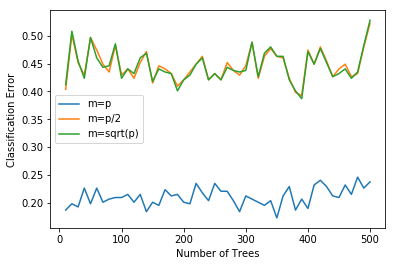

In [49]:
plt.plot(num_trees, error[:,0], label='m=p')
plt.plot(num_trees, error[:,1], label='m=p/2')
plt.plot(num_trees, error[:,2], label='m=sqrt(p)')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error')
plt.legend()

In [52]:
error = np.zeros(4)
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.5)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_test)
Y_pred = clf.predict(X_test)
error[0] = class_error(Y_pred, np.array(Y_test))

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, Y_test)
Y_pred = clf.predict(X_test)
error[1] = class_error(Y_pred, np.array(Y_test))

print('Linear Discriminant error =', error[0])
print('Logistic error =', error[1])

Linear Discriminant error = 0.38691588785046727
Logistic error = 0.39065420560747666


/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
